In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
train = pd.read_csv("train_Madison.csv")
#train = train[:20]
test = pd.read_csv("test_Madison.csv")
names = train["name"]
stars = train["star"]    

In [2]:
ratingTotal = {}
ratingCount = {}
for i in range(0, len(names)):
    name = names[i]
    star = stars[i]
    if name not in ratingTotal:
        ratingTotal[name] = 0
        ratingCount[name] = 0
    ratingTotal[name] += star
    ratingCount[name]+=1
print(len(ratingTotal))
print(len(ratingCount))
ratingAverage = dict((k, float(ratingTotal[k])/ratingCount[k]) for k in ratingCount)
#Turns the predictor from rating to difference above or below mean rating for the restaurant
#for i in range(0, len(names)):
#    name = names[i]
#    diffScore = stars[i]-ratingAverage[name]
#    print(diffScore)
#    diffScores.append(diffScore)
train_city = train['city']
test_city = test['city']
city_dummies = pd.get_dummies(train_city)
city_dummies_T = pd.get_dummies(test_city)
city_dummies.head(5)
#city_dummies_T.head(5)
city_dummies.columns
name_dummies =pd.get_dummies(train['name'])
name_dummies.head(5)

1150
1150


,1847 At the Stamm House,1855 Saloon and Grill,4 Sisters Restaurant,5100 Bar & Grill,5th Quarter Sports Bar & Grill,7-Eleven,A La Brasa Mexican Grill,A&W Restaurant,A-Mart Asian Grocery,A8 China,...,Yofresh Frozen Yogurt Cafe,Yola's Cafe,Yue-Wah Oriental Foods,Yumbutter,ZenZen Taste 四合院,Ziggy's BBQ Smokehouse & Ice Cream Parlor,Zoe's Pizzeria,Zoup!,ZuZu Cafe & Market,koi sushi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
positiveCount = []
negativeCount = []
positiveOverall = []
ratingArray = []
nwords = []
posnshort = []
negnlong = []
nchars = []
avgChars = []
cityscore =[]
#negativeplus = []
#numReviews = []
#posnegratio = []
#rating > 3.7 cities
#zip : 53598, 53706, 53589, 53702, 53508, 53583, 53529, 53559, 53774, 53925
city = ['Belleville', 'Columbus', 'Dane','Marshall', 'McFarland','Paoli', 'Sauk City', 'Stoughton', 'Windsor', 'Madison', 'Verona', 'DeForest', 'Mount Horeb']
#rating <3 cities : Sun praiie, Deforest
#zip : 53527, 53590, 53719, 53713, 53597, 53718, 53531, 53515, 53701
# "casual","creamy", "cocktails", "shared", "chocolate","desserts", "topped", "wine", "specials", "brunch", "share", "curds", "sweet", "cake","family", "fast", "soft","cocktail", "cream","beers","dessert"
# "trying", "middle", "hard", "return", "gotten", "last", "needed", "almost", "expecting","mostly", "working", "already", "salty", "mentioned","brought","server", "guess", "paying","card"

positiveWords = ["knowledgeable", "gem", "highly", "incredible", "amazing", "die", "favorites", "wonderful", "perfect", "fantastic", "notch",
                 "favorite", "awesome", "outstanding", "yum", "delicious", "excellent", "perfectly", "loved", "helpful", "best", 
                 "savory", "cozy", "unique", "yummy", "glad", "homemade", "best", "love", "lovely", "always", "friendly", "fan",  
                 "reasonable", "beautiful", "recommended", "fashioned", "classic", "traditional", "great", "fresh", "definitely",
                 "healthy", "decent", "generous", "comfortable", "rich", "recommend", "local", "authentic", "flavorful", "highly",
                 "enjoyed", "pleased", "flavors", "super", "happy", "absolutely", "tasty", "enjoy", "fun", "reasonably", "plenty",
                 "attentive", "truly", "fancy", "wow", "must", "nicely", "every", "quick", "easily", "craving", "well", "early"]
negativeWords = ["disappointing", "weird", "issue", "none", "last", "problem", "dirty", "mediocre", "ok", "poor", "terrible",
                 "awful", "rude", "horrible", "worst", "overpriced", "needed", "barely", "sorry", "waited", "soggy", "waiting",
                 "bland", "forgot", "hope","unfortunately", "sad", "away", "bad", "loud", "overly", "greasy", "frozen", "dry",
                 "empty", "never", "less", "hard", "expensive", "tiny", "however", "wrong", "longer", "nothing", "average", 
                 "cold", "slow", "lack", "avoid", "forget", "left", "worst", "paid", "money", "minutes", "phone","asking",
                 "manager", "paying", "finally", "called", "charge", "customer", "clearly", "bill", "asked", "told"]
for i in range(0, len(names)):
    #print(i)
    #print(len(names))
    posC = 0
    negC = 0
    cityC = 0
    for word in positiveWords:
        wordCount = train[word][i]
        posC+=wordCount
    for negWord in negativeWords:
        negWordCount = train[negWord][i]
        negC+=negWordCount
    nword = np.array(train["nword"])[i]
    nchar = np.array(train["nchar"])[i]
    Rnames = np.array(train["name"])[i]
    avgChars.append(nchar/nword)
    for town in city:
        if train['city'][i] == town:
            cityC = 1
            break
        else:
            continue
    nwords.append(nword)
    nchars.append(nchar)
    positiveCount.append(posC)
    negativeCount.append(negC)
    cityscore.append(cityC)
    posnshort.append(positiveCount[i]/nwords[i])
    negnlong.append(negativeCount[i]*nwords[i])
    if posC>negC:
        positiveOverall.append(1)
    elif posC<negC:
        positiveOverall.append(-1.5)
    else:
        positiveOverall.append(0)
    ratingArray.append(ratingAverage[names[i]])
    #numReviews.append(ratingCount[names[i]])
#predictors = np.array([positiveCount, negativeCount, ratingArray])

#predictors = np.array([nwords, positiveOverall, ratingArray, positiveCount, negativeCount, posRatio])
#posRatio = np.array(posRatio)
#print(posRatio)


# smallRatingAverage = dict((k, float(ratingTotal[k])/ratingCount[k]) for k in ratingCount if ratingCount[k]<3)
# smallTotal = 0
# for k in smallRatingAverage:
#     smallTotal+=float(smallRatingAverage[k])
# print("Small Total: ", len(smallRatingAverage))
# print("Small Average: ", smallTotal/len(smallRatingAverage))

# largeRatingAverage = dict((k, float(ratingTotal[k])/ratingCount[k]) for k in ratingCount if ratingCount[k]>=50)
# largeTotal = 0
# for k in largeRatingAverage:
#     largeTotal+=float(largeRatingAverage[k])
# print("Large Total: ", len(largeRatingAverage))    
# print("Large Average: ", largeTotal/len(largeRatingAverage))
#47.81 - 0.952
#49.79
#49.91

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

predictors = np.array([positiveOverall, ratingArray, negativeCount, posnshort])
predictors = predictors.T
x_train = pd.DataFrame(predictors)
y_train = train['star']

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
#Normalize
#for k in range(0,4):
for i in range(0, len(y_train)):
    y_train[i] = (y_train[i] - np.mean(y_train))/np.std(y_train)

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
np.mean(y_train)

3.758290145345439

In [5]:
y_variable = pd.DataFrame(y_train)
result = pd.concat([y_variable, x_train], axis=1)
result.columns = ['Star','Overall', 'Rating_avg','num_Negative','Pos_Short']

result.columns[0]

'Star'

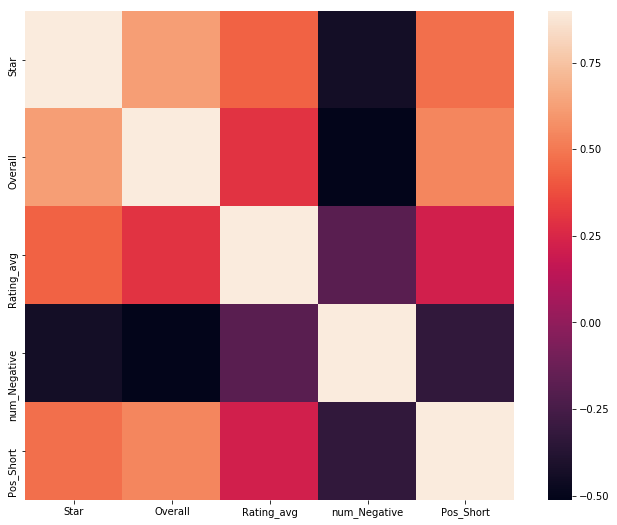

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corrmat = result.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [61]:
#x_train = x_train.join(city_dummies)
x_train = x_train.join(name_dummies)
x_train.head(3)

,0,1,2,3,4,5,6,7,1847 At the Stamm House,1855 Saloon and Grill,...,Yofresh Frozen Yogurt Cafe,Yola's Cafe,Yue-Wah Oriental Foods,Yumbutter,ZenZen Taste 四合院,Ziggy's BBQ Smokehouse & Ice Cream Parlor,Zoe's Pizzeria,Zoup!,ZuZu Cafe & Market,koi sushi
0,0.0,3.721519,13.0,-13.0,0.036932,-4576.0,5.579545,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,3.721519,5.0,-2.0,0.047619,-210.0,5.314286,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3.721519,5.0,-2.0,0.056818,-176.0,6.238636,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
reg = linear_model.LinearRegression()
model_reg = reg.fit(x_train, y_train)

acc_MLR= round(reg.score(x_train, y_train)*100,2)
print(acc_MLR)

random_forest = RandomForestClassifier()
model_rf = random_forest.fit(x_train, y_train)
acc_RF= round(random_forest.score(x_train, y_train)*100,2)
print(acc_RF)

gaussian = GaussianNB()
model_gau = gaussian.fit(x_train, y_train)
acc_NB= round(gaussian.score(x_train, y_train)*100,2)
print(acc_NB)

#linear_svc = LinearSVC()
#linear_svc.fit(predictors, train["star"])
#acc_linear_svc= round(linear_svc.score(predictors, train["star"])*100,2)
#print(acc_linear_svc)

decision_tree = DecisionTreeClassifier()
model_dt = decision_tree.fit(x_train, y_train)
acc_DT= round(decision_tree.score(x_train, y_train)*100,2)
print(acc_DT)

knn = KNeighborsClassifier()
model_knn= knn.fit(x_train, y_train)
acc_knn= round(knn.score(x_train, y_train)*100,2)
print(acc_knn)

#49.87
#50.64(x_train+cityD,nameD)
#50.6(x_train + nameD)

48.71
92.52
46.09
94.78
60.55


In [79]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
model_rfr = rf_reg.fit(x_train, y_train)
acc_RFR = round(rf_reg.score(x_train, y_train)*100,2)
print(acc_RFR)

85.25


In [8]:
ls = linear_model.LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
model_ls = ls.fit(x_train, y_train)

acc_ls= round(ls.score(x_train, y_train)*100,2)
print(acc_ls)


47.95


In [81]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4,
                                   max_features='sqrt', min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)

#KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
#gbm = xgb.XGBRegressor()
#gbm_cv = GridSearchCV(gbm, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
#                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
#gbm_cv.fit(x_train,y_train)
#print(gbm_cv.best_params_)


#lgbr = lgb.LGBMRegressor()
#lgbr = GridSearchCV(lgbr, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
#                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
#lgbr_cv.fit(x_train,y_train)
#print(lgbr_cv.best_params_)
#gbm = xgb.XGBRegressor(**gbm_cv.best_params_)
#model_xgb = gbm.fit(x_train,y_train)

#lgb = lgb.LGBMRegressor(**lgb_cv.best_params_)
#model_lgb = lgb.fit(x_train,y_train)

In [10]:
n_folds = 3

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=96).get_n_splits(x_train.values)
    rmse = np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return (rmse)

In [12]:
#score0 = rmse_cv(model_rfr)
#print("RandomForestRegressor score: {:.4f} ({:.4f})\n".format(score0.mean(), score0.std()))
score1 = rmse_cv(model_rf)
print("RandomForest score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))
score2 = rmse_cv(model_reg)
print("MLR score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
score3 = rmse_cv(model_knn)
print("knn score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))
score4 = rmse_cv(model_gau)
print("NB score: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))
score5 = rmse_cv(model_dt)
print("DT score: {:.4f} ({:.4f})\n".format(score5.mean(), score5.std()))
score00 = rmse_cv(model_ls)
print("LG score: {:.4f} ({:.4f})\n".format(score00.mean(), score00.std()))
#0.9187(9predictors)

RandomForest score: 1.2338 (0.0111)

MLR score: 0.9291 (0.0041)

knn score: 1.2017 (0.0087)

NB score: 1.2265 (0.0026)

DT score: 1.3121 (0.0076)

LG score: 1.1053 (0.0111)



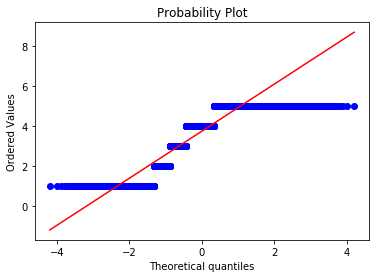

In [13]:
from scipy import stats
from scipy.stats import norm, skew
fig = plt.figure()
res = stats.probplot(result['Star'], plot=plt)
plt.show()

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

C:\Users\LG\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


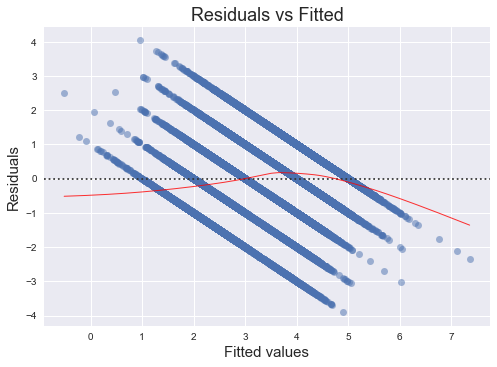

In [16]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, result.columns[0], data=result,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

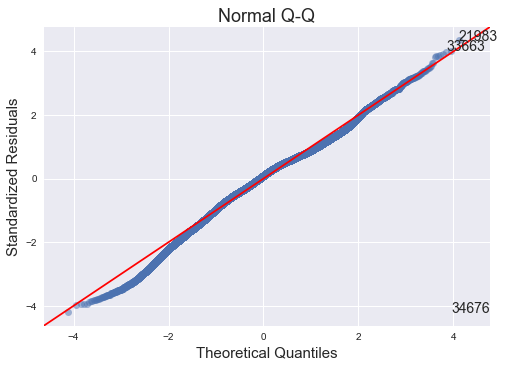

In [17]:
# generate OLS model
model = sm.OLS(y_train, sm.add_constant(x_train))
model_fit = model.fit()

# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

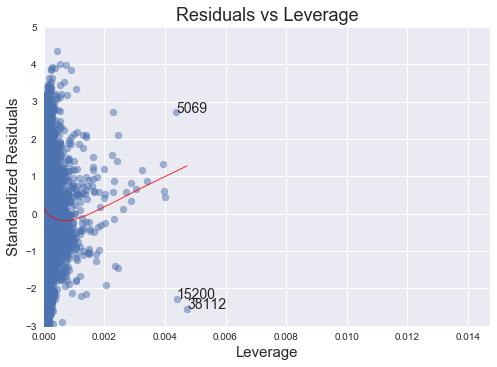

In [19]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

3.758290145345439 1.2972424926947212


C:\Users\LG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\LG\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Star distribution')

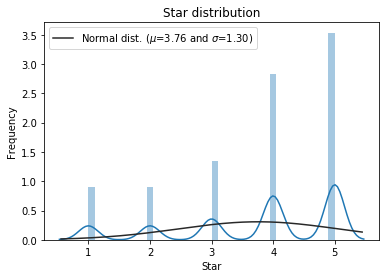

In [102]:
sns.distplot(result['Star'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(result['Star'])
print(mu, sigma)


plt.legend(['Normal dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Star distribution')

In [82]:
score6 = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score6.mean(), score6.std()))
score7 = rmse_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score7.mean(), score7.std()))
#score8 = rmse_cv(KRR)
#print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score8.mean(), score8.std()))
#score9 = rmse_cv(GBoost)
#print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score9.mean(), score9.std()))
score10 = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score10.mean(), score10.std()))
score11 = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score11.mean(), score11.std()))


Lasso score: 0.9291 (0.0144)

ElasticNet score: 0.9291 (0.0144)

Xgboost score: 0.9256 (0.0147)

LGBM score: 0.9236 (0.0135)



In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_predicted = reg.predict(x_train)
y_actual = y_train
rmse = sqrt(mean_squared_error(y_actual, y_predicted))
print("Root Mean Squared Error: ", rmse)
print(reg.coef_)
print(reg.intercept_)
#49.91, 0.918130
#44.47, 0.966646

#Root Mean Squared Error:  0.9181300136754669
#[ 3.63677334e-01  5.70626159e-01  5.39094854e-02 -1.26081086e-01
#  3.44469784e+00  1.27978509e-04  7.67245271e-02  1.83591417e-03
# -4.81609779e-04 -1.83206809e-02]
#1.0442913667733165

Root Mean Squared Error:  0.9290258501044223
[0.47886608 0.59335344 0.05413099 4.65546486]
1.286117915475284


In [27]:
testNames = test["name"]
testIDs = test["Id"]
testExpected = []
for i in range (0, len(testNames)):
    name = testNames[i]
    posC = 0
    negC = 0
    cityS = 0
    posOverall = 0
    if name in ratingAverage:
        rating = ratingAverage[name]
    else:
        rating = 3.758       
    for word in positiveWords:
        wordCount = test[word][i]
        posC+=wordCount
    for word in negativeWords:
        wordCount = test[word][i]
        negC+=wordCount 
    if posC > negC:
        posOverall = 1
    elif posC < negC:
        posOverall = -1.5
    else:
        posOverall = 0
    nword = np.array(test["nword"])[i]
    nchar = np.array(test["nchar"])[i]
    for town in city:
        if test['city'][i] == town:
            cityS = 1
            break
        else:
            continue
    avgChar = nchar/nword
    ratio = (posC)/(negC + 1)
    #numReviews = ratingCount[name]
    posnshort = posC/nword
    negnlong = negC*nword
    #predictors = np.array([[posC, negC, rating]])
    predictors = np.array([[posOverall, rating, posC, negC, posnshort, negnlong, avgChar, nword, cityS]])
    prediction = reg.predict(predictors)
    #prediction = prediction+rating
    testExpected.append(prediction[0])
    #print(prediction)
submitDF = pd.DataFrame({'Id':testIDs, 'Expected':testExpected})
submitDF.to_csv("submission01_g.csv", sep=',', index=False)

In [ ]:
sub = pd.read_csv("submission01_g.csv")

sub